# CS 422 Section 01
<p>Department of Computer Science</p>
<p>Illinois Institute of Technology</p>
<p>Jithin Joyson</p>
<p>Spring 2019: Homework 2</p>

## Part 2.1

In [24]:
library(rpart)
library(caret)
library(rpart.plot)
library(ROCR)
library('dplyr')
library(arules)
library(arulesViz)
setwd(getwd())
set.seed(1122)

### Part 2.1-A

In [25]:
adult_test.df <- read.csv("adult-test.csv", sep = ",", header = T)
adult_train.df <- read.csv("adult-train.csv", sep = ",", header = T)
for (i in names(adult_test.df)){
    vec <- which(adult_test.df[i] == "?")
    vec2 <- which(adult_train.df[i] == "?")
    if(length(vec)){
        adult_test.df <- adult_test.df[-vec,]
        adult_train.df <- adult_train.df[-vec2,]
    }
}
paste("Test observations: ", nrow(adult_test.df))
paste("Train observations: ", nrow(adult_train.df))

[1] "Test observations:  15060"

[1] "Train observations:  30161"

### Part 2.1-B

In [26]:
model <- rpart(income ~ ., method="class", data = adult_train.df)

#### Part 2.1-B-I

In [27]:
model.sum <- summary(model)

Call:
rpart(formula = income ~ ., data = adult_train.df, method = "class")
  n= 30161 

          CP nsplit rel error    xerror        xstd
1 0.12999467      0 1.0000000 1.0000000 0.010001793
2 0.06419819      2 0.7400107 0.7400107 0.008966969
3 0.03729355      3 0.6758125 0.6758125 0.008652716
4 0.01000000      4 0.6385189 0.6385189 0.008457392

Variable importance
  relationship marital_status   capital_gain      education  education_num 
            24             23             10              9              9 
           sex     occupation            age hours_per_week 
             8              7              5              3 

Node number 1: 30161 observations,    complexity param=0.1299947
  predicted class=<=50K  expected loss=0.2489307  P(node) =1
    class counts: 22653  7508
   probabilities: 0.751 0.249 
  left son=2 (16292 obs) right son=3 (13869 obs)
  Primary splits:
      relationship   splits as  RLLLLR, improve=2277.164, (0 missing)
      marital_status splits as  

In [28]:
model.sum['variable.importance']

$variable.importance
  relationship marital_status   capital_gain      education  education_num 
    2277.16382     2241.53439      972.69926      900.05753      900.05753 
           sex     occupation            age hours_per_week native_country 
     746.41190      672.94550      520.48520      313.93303       24.29071 
  capital_loss 
      16.04922

The three most important predictors are Relationship, Marital Status and Capital Gain

#### Part 2.1-B-II

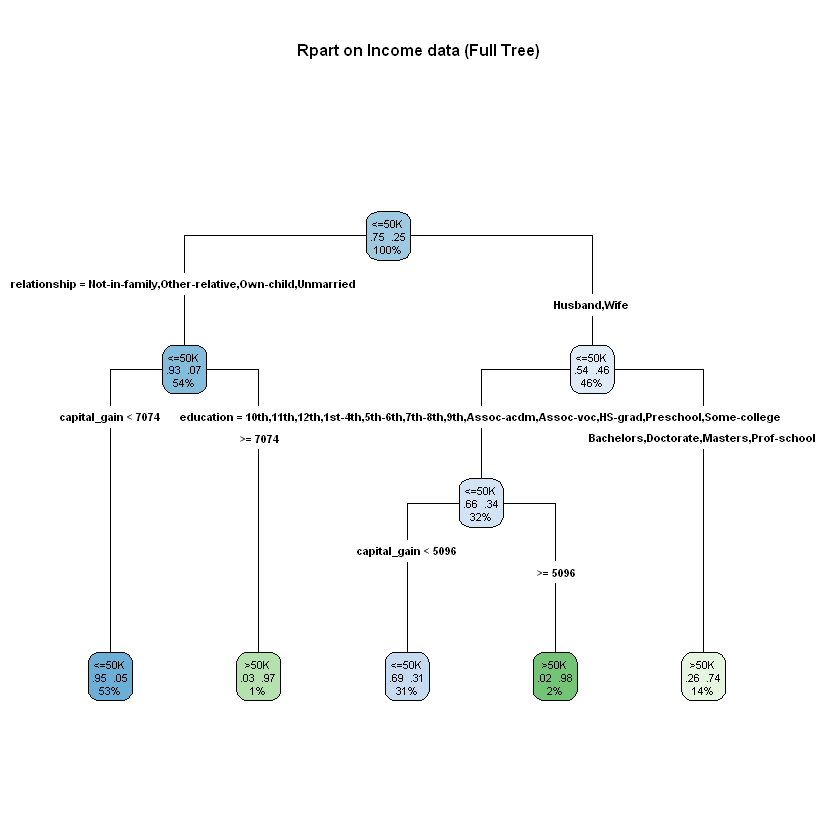

In [29]:
rpart.plot(model, extra=104, fallen.leaves = T, type=4, main="Rpart on Income data (Full Tree)")

The first split is on Relationship

According to the summary, node 1's predicted class is <= 50k

The distribution of observations between the <=50K and >50K classes at first node are:

    Class          <= 50K       >50K
               
    Class Counts    22653       7508

    Probabilities   0.751       0.249

    Distribution     75%         25%

### Part 2.1-C

In [30]:
pred <- predict(model, adult_test.df, type="class")
conf <- confusionMatrix(pred, as.factor(adult_test.df[, ncol(adult_test.df)]))
conf

Confusion Matrix and Statistics

          Reference
Prediction <=50K  >50K
     <=50K 10772  1837
     >50K    588  1863
                                         
               Accuracy : 0.839          
                 95% CI : (0.833, 0.8448)
    No Information Rate : 0.7543         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5098         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9482         
            Specificity : 0.5035         
         Pos Pred Value : 0.8543         
         Neg Pred Value : 0.7601         
             Prevalence : 0.7543         
         Detection Rate : 0.7153         
   Detection Prevalence : 0.8373         
      Balanced Accuracy : 0.7259         
                                         
       'Positive' Class : <=50K          
                                         

#### Part 2.1-C-I

In [31]:
str(conf)

List of 6
 $ positive: chr "<=50K"
 $ table   : 'table' int [1:2, 1:2] 10772 588 1837 1863
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "<=50K" ">50K"
  .. ..$ Reference : chr [1:2] "<=50K" ">50K"
 $ overall : Named num [1:7] 0.839 0.51 0.833 0.845 0.754 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.948 0.504 0.854 0.76 0.854 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"


In [32]:
balanced_accuracy <- round(mean(c(conf$byClass[['Sensitivity']],conf$byClass[['Specificity']])), 3)
paste("Balanced Accuracy: ",balanced_accuracy)

[1] "Balanced Accuracy:  0.726"

#### Part 2.1-C-II

In [33]:
balanced_error_rate = 1 - balanced_accuracy
paste("Balanced Error Rate: ",balanced_error_rate)

[1] "Balanced Error Rate:  0.274"

#### Part 2.1-C-III

In [34]:
paste("Sensitivity: ",conf$byClass[['Sensitivity']])
paste("Specificity: ",conf$byClass[['Specificity']])

[1] "Sensitivity:  0.948239436619718"

[1] "Specificity:  0.503513513513513"

#### Part 2.1-C-IV

The area under curve (AUC) for this model is  0.843

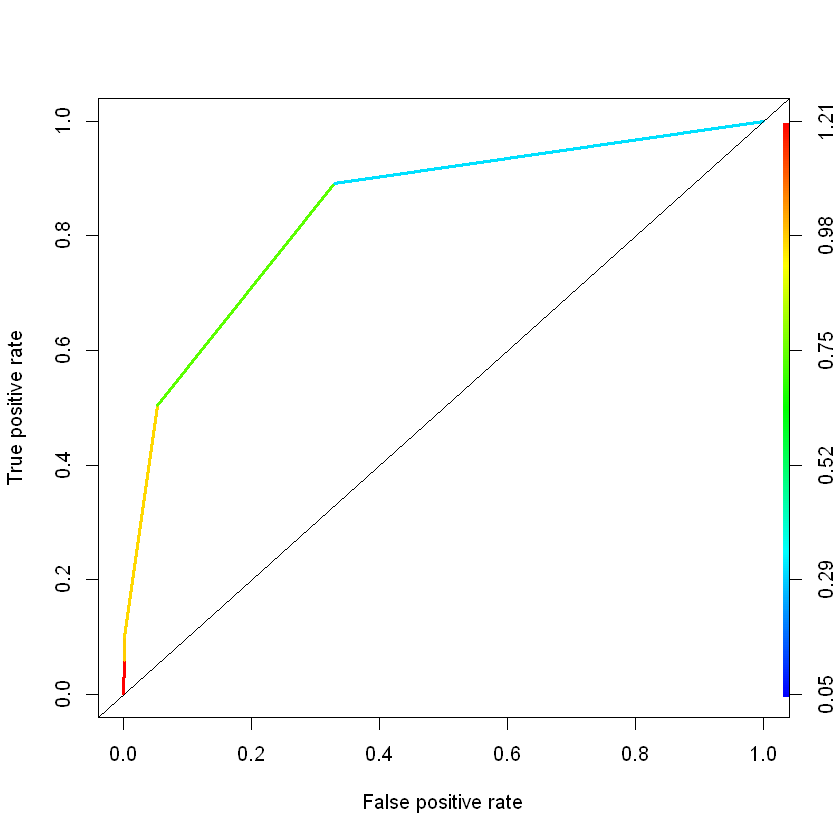

In [35]:
pred.rocr <- predict(model, adult_test.df, type="prob")[, 2]
f.pred <- prediction(pred.rocr, adult_test.df$income)
f.perf <- performance(f.pred, "tpr", "fpr")
plot(f.perf, colorize=T, lwd=3)
abline(0,1)
auc <- performance(f.pred, measure = "auc")
cat(paste("The area under curve (AUC) for this model is ", round(auc@y.values[[1]], 3)))

### Part 2.1-D

In [36]:
printcp(model)


Classification tree:
rpart(formula = income ~ ., data = adult_train.df, method = "class")

Variables actually used in tree construction:
[1] capital_gain education    relationship

Root node error: 7508/30161 = 0.24893

n= 30161 

        CP nsplit rel error  xerror      xstd
1 0.129995      0   1.00000 1.00000 0.0100018
2 0.064198      2   0.74001 0.74001 0.0089670
3 0.037294      3   0.67581 0.67581 0.0086527
4 0.010000      4   0.63852 0.63852 0.0084574


Looking at the xerror column, the value keeps droping till the the last split so there is no need to prune the tree. Thus, the tree does not benefit from pruning.

### Part 2.1-E

In [37]:
train_less50k <- filter(adult_train.df, income == ">50K")
train_more50k <- filter(adult_train.df, income == "<=50K")

#### Part 2.1-E-I

In [38]:
paste("There are ",nrow(train_more50k)," observations in the class <=50K")
paste("There are ",nrow(train_less50k)," observations in the class >50K")

[1] "There are  22653  observations in the class <=50K"

[1] "There are  7508  observations in the class >50K"

#### Part 2.1-E-II

In [39]:
indicies <- sample(1:nrow(train_more50k), nrow(train_less50k))
train_more50k <- train_more50k[indicies, ]
new_training_dataset <- rbind (train_more50k, train_less50k)

#### Part 2.1-E-III

In [40]:
model = rpart(income ~ ., method="class", data = new_training_dataset)
pred <- predict(model, adult_test.df, type="class")
conf <- confusionMatrix(pred, as.factor(adult_test.df[, ncol(adult_test.df)]))

##### Part 2.1-E-III-I

In [41]:
balanced_accuracy <- round(mean(c(conf$byClass[['Sensitivity']],conf$byClass[['Specificity']])), 3)
paste("Balanced Accuracy: ",balanced_accuracy)

[1] "Balanced Accuracy:  0.809"

##### Part 2.1-E-III-II

In [42]:
balanced_error_rate = 1 - balanced_accuracy
paste("Balanced Error Rate: ",balanced_error_rate)

[1] "Balanced Error Rate:  0.191"

##### Part 2.1-E-III-III

In [43]:
paste("Sensitivity: ",conf$byClass[['Sensitivity']])
paste("Specificity: ",conf$byClass[['Specificity']])

[1] "Sensitivity:  0.781602112676056"

[1] "Specificity:  0.835405405405405"

##### Part 2.1-E-III-IV

The area under curve (AUC) for this model is  0.846

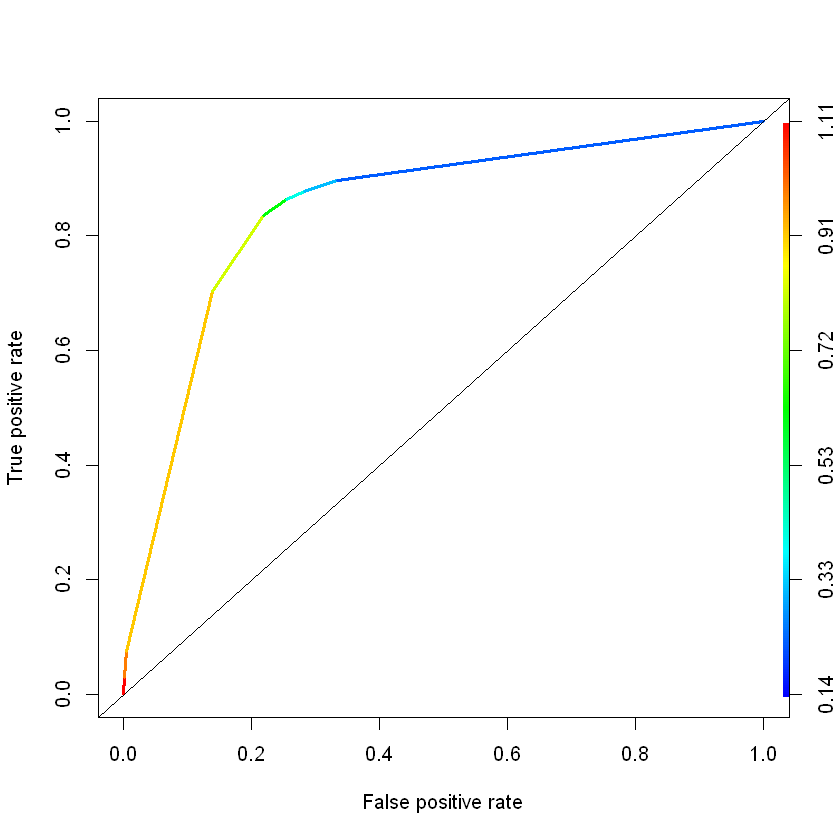

In [44]:
pred.rocr <- predict(model, adult_test.df, type="prob")[, 2]
f.pred <- prediction(pred.rocr, adult_test.df$income)
f.perf <- performance(f.pred, "tpr", "fpr")
plot(f.perf, colorize=T, lwd=3)
abline(0,1)
auc <- performance(f.pred, measure = "auc")
cat(paste("The area under curve (AUC) for this model is ", round(auc@y.values[[1]], 3)))

### Part 2.1-F

In [45]:
conf

Confusion Matrix and Statistics

          Reference
Prediction <=50K >50K
     <=50K  8879  609
     >50K   2481 3091
                                          
               Accuracy : 0.7948          
                 95% CI : (0.7883, 0.8012)
    No Information Rate : 0.7543          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5271          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7816          
            Specificity : 0.8354          
         Pos Pred Value : 0.9358          
         Neg Pred Value : 0.5547          
             Prevalence : 0.7543          
         Detection Rate : 0.5896          
   Detection Prevalence : 0.6300          
      Balanced Accuracy : 0.8085          
                                          
       'Positive' Class : <=50K           
                                          

The accuracy differed by (.809 - .726) = .083 and increased as the datset is more balanced.

The balanced error thus decreased (inverse of balanced accuracy) as the datset was pre balanced. (.191 - .274) = -.083.

The sensitivity decreased and the specificity increased which is good since the model has become more complex and less general.

The PPV increased from .854 to .935 as the dataset was pre balances and the AUC also increased from .843 to .846

## Part 2.2

### Part 2.2-A

In [46]:
tr_1k = read.transactions("tr-1k-canonical.csv", sep = ",")
tr_5k = read.transactions("tr-5k-canonical.csv", sep = ",")
tr_20k = read.transactions("tr-20k-canonical.csv", sep = ",")
tr_75k = read.transactions("tr-75k-canonical.csv", sep = ",")

### Part 2.2-B

In [47]:
summary(tr_1k)

transactions as itemMatrix in sparse format with
 1000 rows (elements/itemsets/transactions) and
 50 columns (items) and a density of 0.07076 

most frequent items:
Gongolais Cookie     Truffle Cake     Tuile Cookie       Berry Tart 
             108              103              102               95 
      Hot Coffee          (Other) 
              94             3036 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8 
 60 162 338 216 132  44  32  16 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   3.538   4.000   8.000 

includes extended item information - examples:
            labels
1 Almond Bear Claw
2 Almond Croissant
3      Almond Tart

In [48]:
f_is <- apriori(tr_1k, parameter=list(support=.04, target="frequent itemsets"))
inspect(sort(f_is, decreasing = T, by="count"))
rm(f_is)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.04      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 40 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [46 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [59 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     items                                     support count
[1]  {Gongolais Cookie}                        0.108   108  
[2]  {Truffle Cake}                            0.103   103  
[3]  {Tuile Cookie}                            0.102   102  
[4]  {Berry Tart}      

In [49]:
rules <- apriori(tr_1k, parameter = list(sup = 0.02, conf = 1, target = "rules"))
inspect(sort(rules, by="count", decreasing=T))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          1    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 20 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [50 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [11 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs                  support confidence     lift count
[1]  {Apricot Croissant,                                                           
      Hot Coffee}         => {Blueberry Tart}       0.032          1 12.34568    32
[2]  {Apple Danish,               

After trying different min sup values from .1 to .01, .02 was reached since rules (more than 5) are created when the minsup is droped to this value with respect to confidence = 1

lhs is antecedent

rhs is  consequent

support is support of the rule

confidence is confidence of the rule

In [50]:
summary(tr_5k)

transactions as itemMatrix in sparse format with
 5000 rows (elements/itemsets/transactions) and
 50 columns (items) and a density of 0.07094 

most frequent items:
   Coffee Eclair       Hot Coffee     Tuile Cookie  Strawberry Cake 
             554              513              499              480 
Gongolais Cookie          (Other) 
             477            15212 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8 
 248  923 1601 1144  596  237  148  103 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   3.547   4.000   8.000 

includes extended item information - examples:
            labels
1 Almond Bear Claw
2 Almond Croissant
3      Almond Tart

In [51]:
f_is <- apriori(tr_5k, parameter=list(support=.09, target="frequent itemsets"))
inspect(sort(f_is, decreasing = T, by="count"))
rm(f_is)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.09      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 450 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 5000 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [7 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    items              support count
[1] {Coffee Eclair}    0.1108  554  
[2] {Hot Coffee}       0.1026  513  
[3] {Tuile Cookie}     0.0998  499  
[4] {Strawberry Cake}  0.0960  480  
[5] {Gongolais Cookie} 0.0954  477  
[6] {Orange Juice}     0.0922  461  
[7] {Cherry

In [52]:
rules <- apriori(tr_5k, parameter = list(sup = 0.02
                                         , conf = 1, target = "rules"))
inspect(sort(rules, by="count"))
rm(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          1    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 5000 transaction(s)] done [0.00s].
sorting and recoding items ... [50 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [18 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs                  support confidence      lift count
[1]  {Almond Twist,                                                                 
      Apple Pie,                                                                    
      Hot Coffee}         =>

After trying different min sup values from .1 to .01, .02 was reached since rules(more than 5) are created when the minsup is droped to this value with respect to confidence = 1

summary(tr_20k)

In [53]:
f_is <- apriori(tr_20k, parameter=list(support=.09, target="frequent itemsets"))
inspect(sort(f_is, decreasing = T, by="count"))
rm(f_is)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.09      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1800 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 20000 transaction(s)] done [0.00s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [8 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    items              support count
[1] {Coffee Eclair}    0.10985 2197 
[2] {Hot Coffee}       0.10360 2072 
[3] {Tuile Cookie}     0.09865 1973 
[4] {Apricot Danish}   0.09270 1854 
[5] {Orange Juice}     0.09240 1848 
[6] {Strawberry Cake}  0.09200 1840 
[7] {Gong

In [54]:
rules <- apriori(tr_20k, parameter = list(sup = 0.02
                                         , conf = 1, target = "rules"))
inspect(sort(rules, by="count"))
rm(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          1    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 400 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 20000 transaction(s)] done [0.00s].
sorting and recoding items ... [50 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                     rhs                  support confidence    lift count
[1] {Green Tea,                                                                  
     Lemon Cookie,                                                               
     Lemon Lemonade,                 

After trying different min sup values from .1 to .01, .02 was reached since rules are created when the minsup is droped to this value with respect to confidence = 1

In [55]:
summary(tr_75k)

transactions as itemMatrix in sparse format with
 75000 rows (elements/itemsets/transactions) and
 50 columns (items) and a density of 0.07098907 

most frequent items:
  Coffee Eclair      Hot Coffee    Tuile Cookie     Cherry Tart Strawberry Cake 
           8193            7700            7556            6987            6948 
        (Other) 
         228825 

element (itemset/transaction) length distribution:
sizes
    1     2     3     4     5     6     7     8 
 3592 13579 24674 17003  8640  3840  2191  1481 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   3.549   4.000   8.000 

includes extended item information - examples:
            labels
1 Almond Bear Claw
2 Almond Croissant
3      Almond Tart

In [56]:
f_is <- apriori(tr_75k, parameter=list(support=.09, target="frequent itemsets"))
inspect(sort(f_is, decreasing = T, by="count"))
rm(f_is)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.09      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 6750 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 75000 transaction(s)] done [0.02s].
sorting and recoding items ... [8 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 done [0.00s].
writing ... [8 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    items              support    count
[1] {Coffee Eclair}    0.10924000 8193 
[2] {Hot Coffee}       0.10266667 7700 
[3] {Tuile Cookie}     0.10074667 7556 
[4] {Cherry Tart}      0.09316000 6987 
[5] {Strawberry Cake}  0.09264000 6948 
[6] {Apricot Danish}   0.092

In [57]:
rules <- apriori(tr_75k, parameter = list(sup = 0.02
                                         , conf = 1, target = "rules"))
inspect(sort(rules, by="count"))
rm(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          1    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1500 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 75000 transaction(s)] done [0.02s].
sorting and recoding items ... [50 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
    lhs                     rhs                     support confidence     lift count
[1] {Green Tea,                                                                      
     Lemon Cookie,                                                                   
     Raspberry Cookie,  

After trying different min sup values from .1 to .01, .02 was reached since rules are created when the minsup is droped to this value with respect to confidence = 1

### Part 2.2-C

It was interesting to see how the min sup had to be droped as the amount of transactions increased. The number of rules also decreased when using the same minsup so minsup was droped

### Part 2.2-D

In [58]:
f_is <- apriori(tr_75k, parameter=list(support=.02, target="frequent itemsets"))
inspect(sort(f_is, decreasing = T, by="count"))
rm(f_is)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1500 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[50 item(s), 75000 transaction(s)] done [0.02s].
sorting and recoding items ... [50 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [124 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
      items                    support count
[1]   {Coffee Eclair}       0.10924000  8193
[2]   {Hot Coffee}          0.10266667  7700
[3]   {Tuile Cookie}        0.10074667  7556
[4]   {Cherry Tart}         0.09316000  6987
[5]   {Strawberry Cake}     0.0926

The most frequent item [1] with count 8193 is Coffee Eclair

The least frequent item [59] with count 3145 is Chocolate Meringue